<a href="https://colab.research.google.com/github/ShvetsovEgor/ML/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B8_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B7%D1%80%D0%B5%D0%BD%D0%B8%D1%8F_%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Скачайте датасет cifar10, посмотрите на картинке, разделите выборки и обучите одну полносвязную архитектуру из прошлого домашнего задания. Используйте SparseCategoricalCrossentropy. Выведите summary модели, посмотрите на графики обучения, сделайте выводы.

In [1]:
import tensorflow as tf
from keras.utils import to_categorical

In [2]:
(train_images_full, train_labels_full), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images_full, test_images = train_images_full / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 7s 0us/step


In [3]:
print("Train size = %i, test_size = %i"%(len(train_images_full),len(test_images)))

Train size = 50000, test_size = 10000


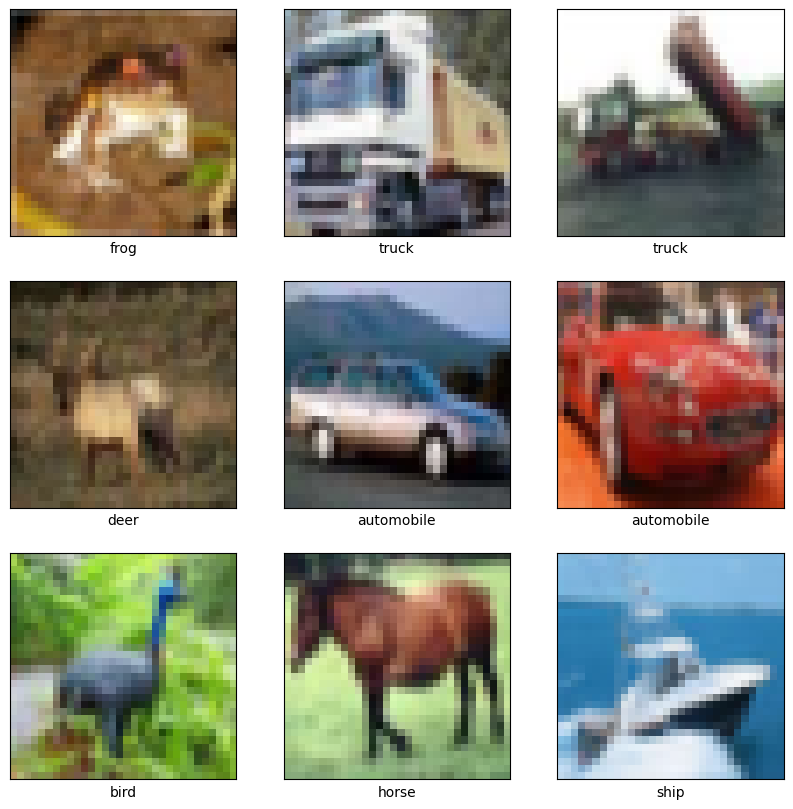

In [4]:
import matplotlib.pyplot as plt



class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels_full[i][0]])
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
val_size = 0.01

train_images, validation_images, train_labels, validation_labels = train_test_split(train_images_full, train_labels_full, test_size=val_size) 


In [6]:
batch_size = 512

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))  ### your code here
train_dataset = train_dataset.shuffle(buffer_size=1024, reshuffle_each_iteration=True)
train_dataset = train_dataset.batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels)) ### your code here
val_dataset = val_dataset.batch(batch_size)


In [7]:
input_shape = train_images.shape[-3:]

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10)])

model.compile(
    optimizer='sgd',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])


In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 395,146
Trainable params: 394,890
Non-trainable params: 256
_________________________________________________________________


In [9]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


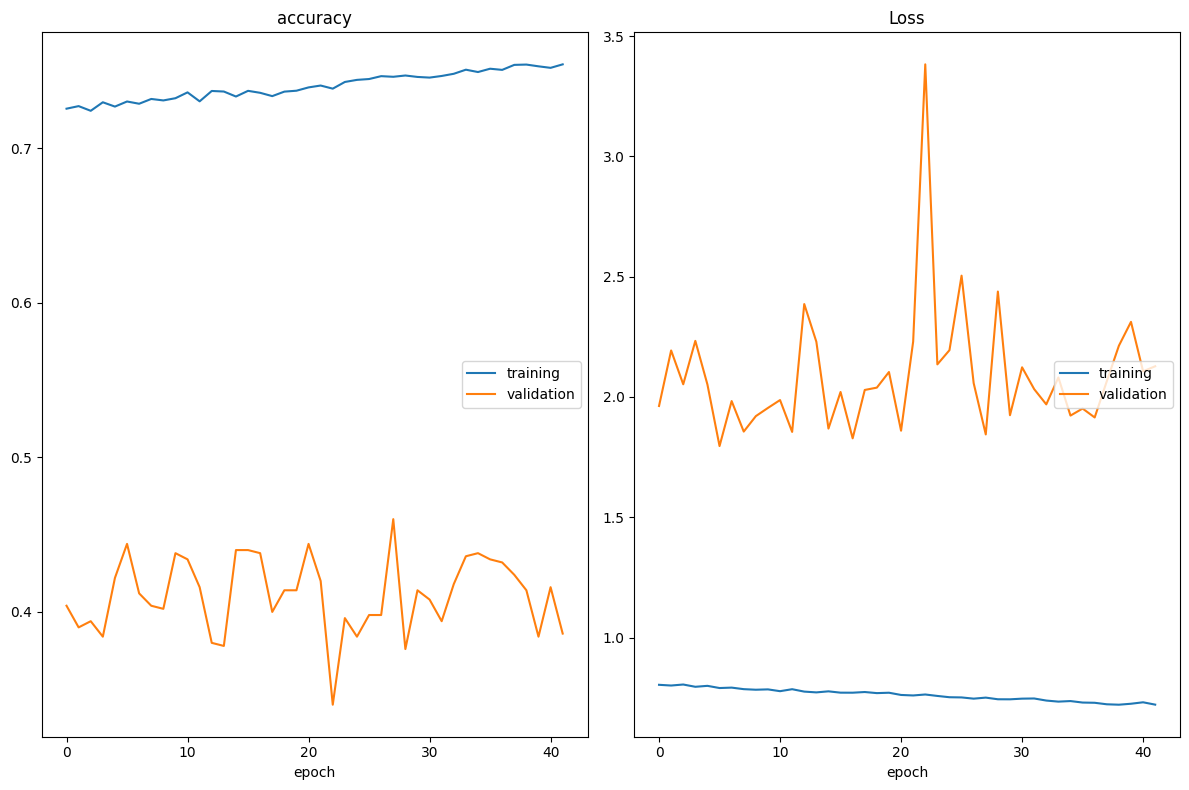

accuracy
	training         	 (min:    0.724, max:    0.754, cur:    0.754)
	validation       	 (min:    0.340, max:    0.460, cur:    0.386)
Loss
	training         	 (min:    0.721, max:    0.805, cur:    0.721)
	validation       	 (min:    1.796, max:    3.382, cur:    2.128)


In [12]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
from livelossplot import PlotLossesKeras
model.fit(train_dataset, validation_data=val_dataset, epochs=100, callbacks=[callback, PlotLossesKeras()], verbose=False)

In [13]:
model_conv = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10)])

model_conv.compile(
    optimizer='sgd',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [14]:
model_conv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 3600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               460928    
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 10)               

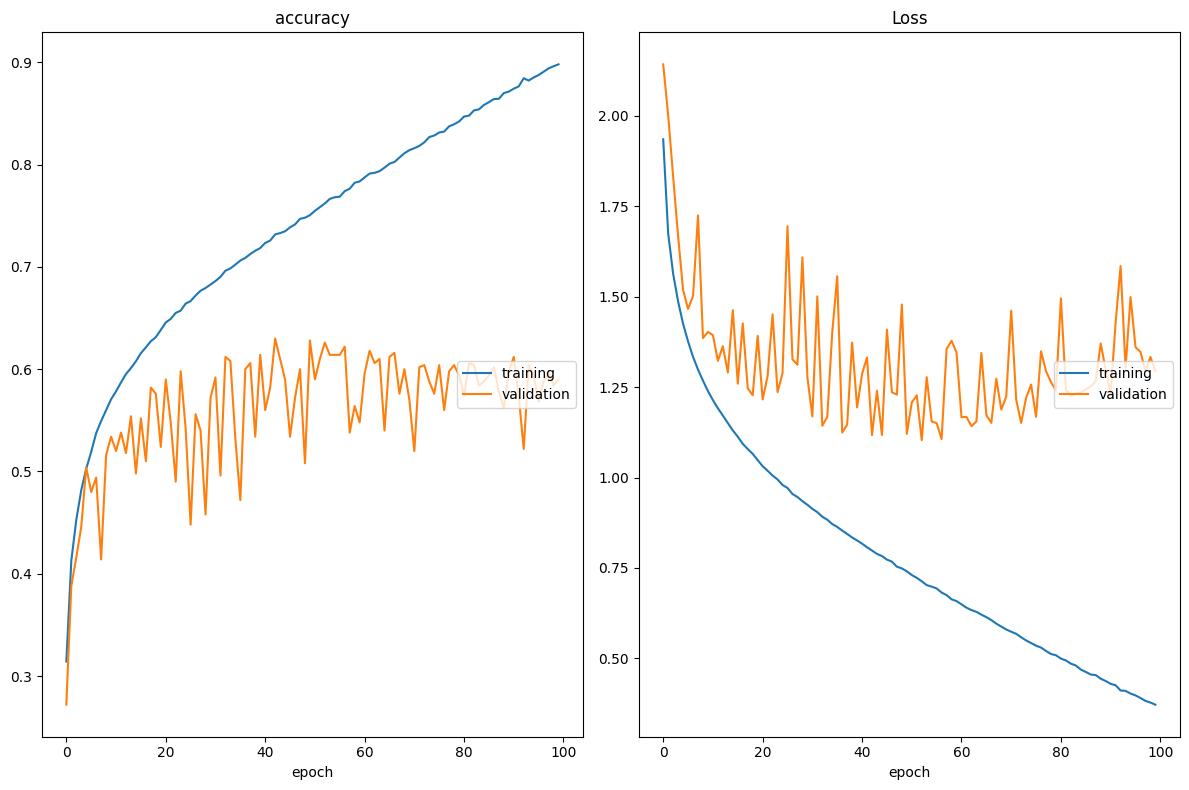

accuracy
	training         	 (min:    0.314, max:    0.898, cur:    0.898)
	validation       	 (min:    0.272, max:    0.630, cur:    0.590)
Loss
	training         	 (min:    0.372, max:    1.935, cur:    0.372)
	validation       	 (min:    1.104, max:    2.142, cur:    1.295)


In [16]:
from livelossplot import PlotLossesKeras
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model_conv.fit(train_dataset, validation_data=val_dataset, epochs=100, callbacks=[callback, PlotLossesKeras()], verbose=False)

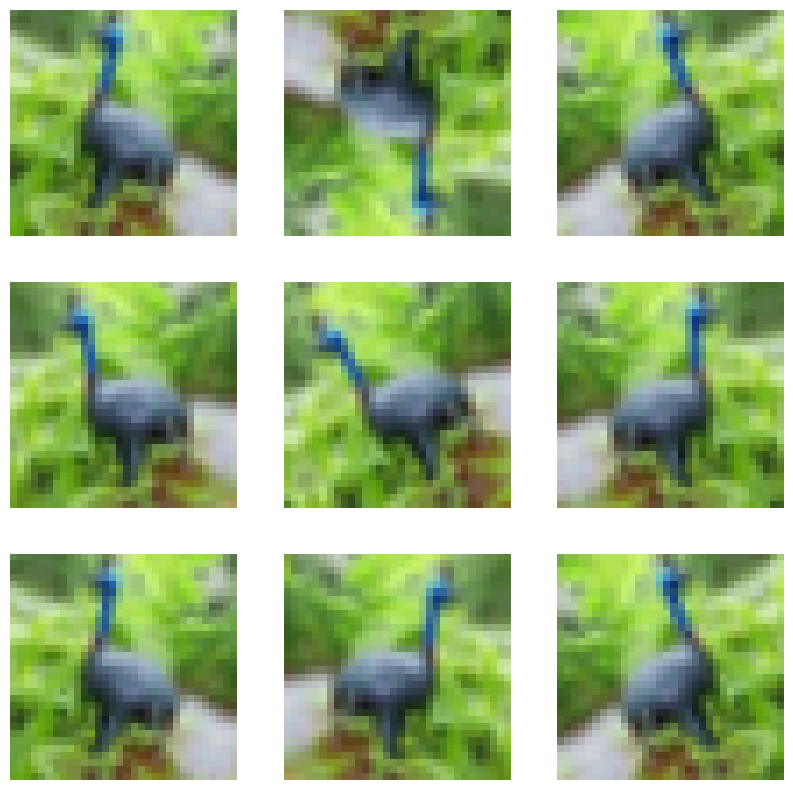

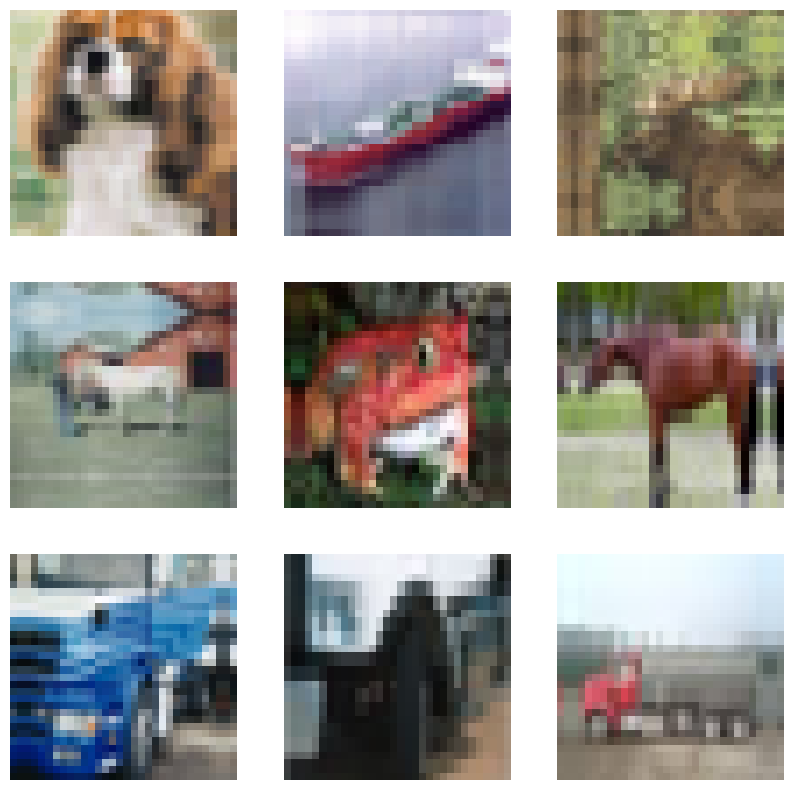

In [18]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
#   layers.RandomContrast([1.0, 10.0]),
  layers.RandomZoom(.5, .2, interpolation='nearest'),
#   layers.RandomCrop(500, 500, 1),
  # layers.RandomRotation(0.1),
])

import numpy as np

augmented_train_dataset = train_dataset.map(
  lambda x, y: (data_augmentation(x, training=True), y))

data_augmentation_vis = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.1),
])

image = tf.cast(tf.expand_dims(train_images_full[6], 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation_vis(image, training=True)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")


sample_x, sample_y = next(iter(augmented_train_dataset))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(sample_x[i])
  plt.axis("off")

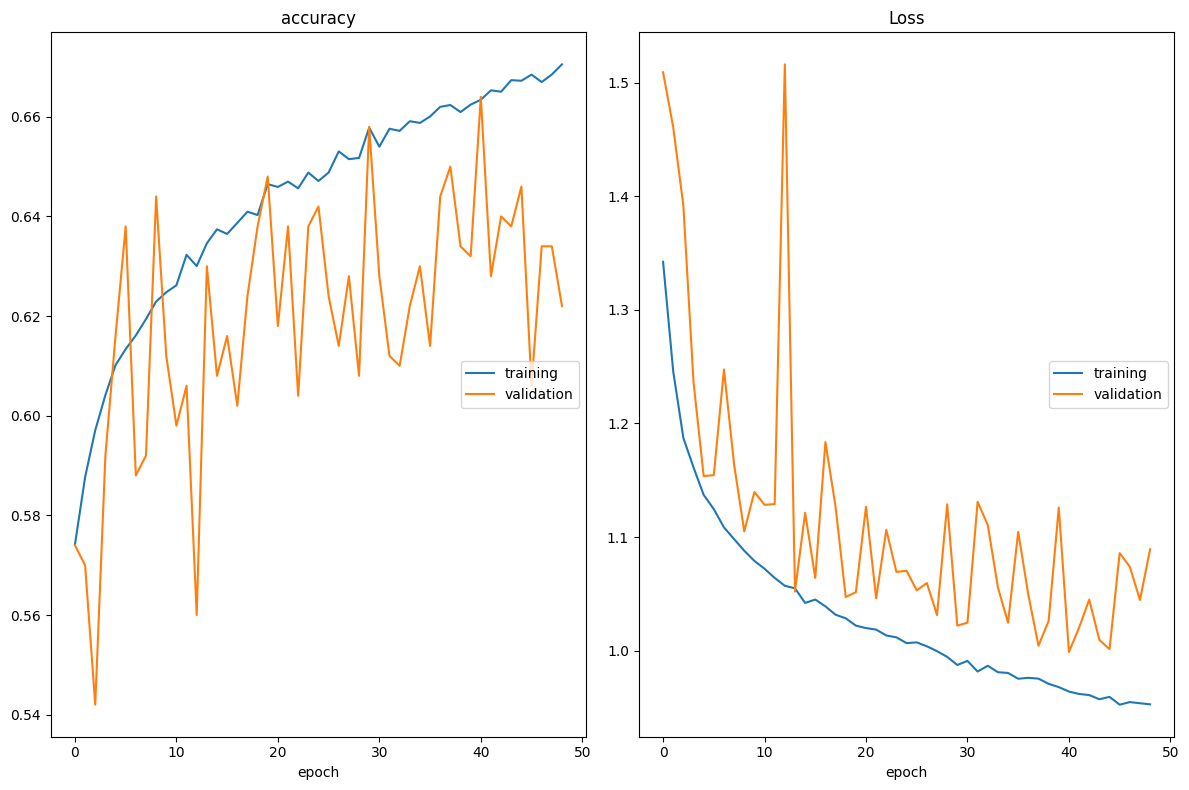

accuracy
	training         	 (min:    0.574, max:    0.671, cur:    0.671)
	validation       	 (min:    0.542, max:    0.664, cur:    0.622)
Loss
	training         	 (min:    0.952, max:    1.342, cur:    0.953)
	validation       	 (min:    0.999, max:    1.516, cur:    1.089)


In [19]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
from livelossplot import PlotLossesKeras
model_conv.fit(augmented_train_dataset, validation_data=val_dataset, epochs=100, callbacks=[callback, PlotLossesKeras()], verbose=False)

In [20]:
input_shape = train_images.shape[-3:]
print(input_shape)

inputs = tf.keras.layers.Input(shape=input_shape, name='img')
x1 = tf.keras.layers.Conv2D(64, 3, activation='relu')(inputs)
# x4 = tf.keras.layers.Conv2D(64, 3, activation='relu')(x1)
x3 = tf.keras.layers.MaxPooling2D(3)(x1)
x2 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x3)
# x4 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x2)
skip = tf.keras.layers.add([x2, x3])
x = tf.keras.layers.Flatten()(skip)
x = tf.keras.layers.Dense(16, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)

outputs = tf.keras.layers.Dense(10, activation='relu')(x)
model_skip = tf.keras.Model(inputs, outputs)

(32, 32, 3)


In [21]:
model_skip.compile(
    optimizer='sgd',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])
model_skip.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 30, 30, 64)   1792        ['img[0][0]']                    
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 10, 10, 64)  0           ['conv2d_1[0][0]']               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 10, 10, 64)   36928       ['max_pooling2d_1[0][0]']        
                                                                                              

In [ ]:
!pip install livelossplot
from livelossplot import PlotLossesKeras

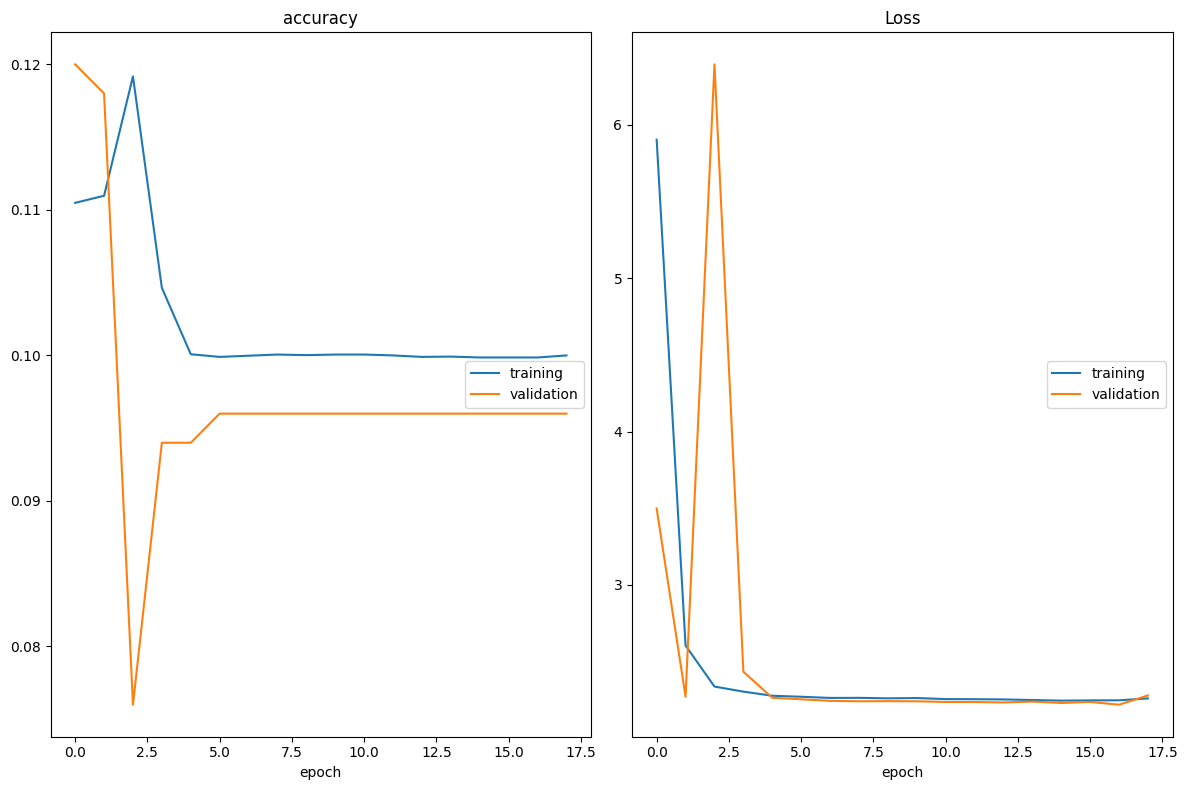

accuracy
	training         	 (min:    0.100, max:    0.119, cur:    0.100)
	validation       	 (min:    0.076, max:    0.120, cur:    0.096)
Loss
	training         	 (min:    2.246, max:    5.904, cur:    2.260)
	validation       	 (min:    2.219, max:    6.395, cur:    2.280)


In [23]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
from livelossplot import PlotLossesKeras
model_skip.fit(augmented_train_dataset, validation_data=val_dataset, epochs=100, callbacks=[callback, PlotLossesKeras()], verbose=False)

## Сравнивая Accuracy моделей получаем, что модели 2 4 показали себя лучше всего на данном датасете. Внесла вклад аугментация изображений а также сочетание свертки с maxpooling + bath нормализация